In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("wine-clustering.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
print(df.columns)

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [7]:
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
X = df[features]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [13]:
kmeans = KMeans(n_clusters=4, n_init=10,random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [15]:
df['cluster'] = clusters

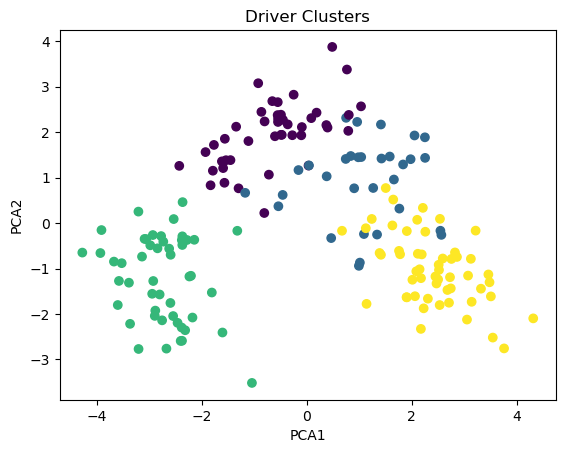

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Driver Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [19]:
print(df.groupby('cluster')[features].mean())


           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
cluster                                                              
0        12.255455    1.732500  2.187955     20.054545   89.613636   
1        12.434194    2.301935  2.400968     20.454839  104.129032   
2        13.151633    3.344490  2.434694     21.438776   99.020408   
3        13.795926    1.933333  2.430370     16.724074  106.129630   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
cluster                                                                     
0             2.006818    1.771818              0.406364         1.333409   
1             2.691613    2.619677              0.291613         2.080645   
2             1.678163    0.797959              0.450816         1.163061   
3             2.862222    3.017407              0.285185         1.907778   

         Color_Intensity       Hue     OD280      Proline  
cluster                                                 